### Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the `prediction variable` or `output` in which you are interested.

![](https://upload.wikimedia.org/wikipedia/commons/0/04/Feature_selection_Wrapper_Method.png)
Having `irrelevant features` in your data can `decrease the accuracy` of many models, especially linear algorithms like linear and logistic regression.

Three importance of performing feature selection before modeling your data are:

1. **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
2. **Improves Accuracy**: Less misleading data means modeling accuracy improves.
3. **Reduces Training Time**: Less data means that algorithms train faster.

This section lists 4 feature selection recipes for machine learning in Python

1. **Univariate Selection**
2. **Recursive Feature Elimination**
3. **Principal Component Analysis**
4. **Feature Importance**
5. **Removing features with low variance**


### Problem Stastement:

if a person have Feaver what are Features are imporent 
* **Normal:** 36.5–37.5 °C (97.7–99.5 °F)
* **Fever:** >37.5 or 38.3 °C (99.5 or 100.9 °F)
* **Hypothermia:** <35.0 °C (95.0 °F)

## Symptoms For Fever
1. Sweating
2. Chills and shivering.
3. Headache
4. Muscle aches
5. Loss of appetite
6. Irritability
7. Dehydration
8. Temp
9.Type of Fever

![](https://lh3.googleusercontent.com/-KCPt4GoixT8/Xxbyn5JiOfI/AAAAAAAApXo/rd7g4glMvSgkcYOW5M_-rAhieXZphDsSACK8BGAsYHg/s0/2020-07-21.png)


In [1]:
import numpy as np

In [2]:
x = np.array([[1,2,3,4,5,6]])
y = np.array([0,3,6,9,12,15])

In [3]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [4]:
np.cov(x,y) 

array([[ 3.5, 10.5],
       [10.5, 31.5]])

In [5]:
import matplotlib.pyplot as plt

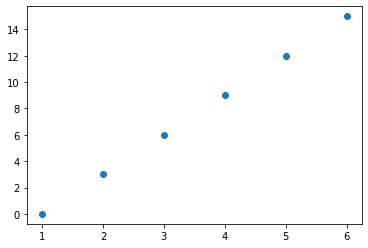

In [6]:
plt.scatter(x,y)

#### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

1. The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different statistical tests to select a specific number of features.

2. Many different statistical test scan be used with this selection method. For example the **ANOVA F-value** method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the **f_classif()** function. We will select the 4 best features using this method in the example below.




In [7]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,f_regression,chi2,f_oneway
from sklearn.feature_selection import GenericUnivariateSelect,SelectPercentile,SelectFpr,SelectFdr,SelectFwe

In [8]:
# load data
filename = 'https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/pima-indians-diabetes.csv'
dataframe = read_csv(filename)

In [9]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


* **f_classif** --> ANOVA F-value between label/feature for classification tasks.

* **mutual_info_classif**--> Mutual information for a discrete target.

* **chi2**-->Chi-squared stats of non-negative features for classification tasks.

* **f_regression**--> F-value between label/feature for regression tasks.

* **mutual_info_regression**--> Mutual information for a continuous target.

* **SelectPercentile**--> Select features based on percentile of the highest scores.

* **SelectFpr** --> Select features based on a false positive rate test.

* **SelectFdr** -->Select features based on an estimated false discovery rate.

* **SelectFwe** --> Select features based on family-wise error rate.

* **GenericUnivariateSelect**-->Univariate feature selector with configurable mode

In [10]:
array = dataframe.values

In [11]:
X = array[:,0:8]
Y = array[:,8]

In [12]:
# feature extraction
test = SelectKBest(score_func=f_classif, 
                   k=4)
fit = test.fit(X, Y)

In [13]:
fit.score_func(X,Y)

(array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
         13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124]),
 array([5.06512730e-10, 8.93543165e-43, 7.15139001e-02, 3.83477048e-02,
        2.86186460e-04, 1.22980749e-16, 1.25460701e-06, 2.20997546e-11]))

In [14]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [15]:
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


In [16]:
import pandas as pd
pd.Series(fit.scores_)

0     39.670227
1    213.161752
2      3.256950
3      4.304381
4     13.281108
5     71.772072
6     23.871300
7     46.140611
dtype: float64

You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores). Specifically features with indexes 0 (Pregnancies), 1 (plas), 5 (mass), and 7 (age).

#### 2. Recursive Feature Elimination
* The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

* It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

* You can learn more about the RFE class in the [scikit-learn documentation.]()


![](https://lh3.googleusercontent.com/-Kq_fnU7FHgc/XuQvTR5PKtI/AAAAAAAAonI/GQz_Nc8nwOsNPy5NNPjo0nYy9DzUtiiEwCK8BGAsYHg/s0/2020-06-12.png)


The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.


Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

In [31]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
# feature extraction
model = LogisticRegression(solver='lbfgs',max_iter=500)

In [34]:
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 5 4 1 1 2]


In [35]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
print("Rank 1 Features")
dataframe[['Pregnancies','BMI', 'DiabetesPedigreeFunction','Glucose']].head(2)

Rank 1 Features


,Pregnancies,BMI,DiabetesPedigreeFunction,Glucose
0,6,33.6,0.627,148
1,1,26.6,0.351,85


You can see that RFE chose the the top 4 features as `Pregnancies`, `BMI` and `DiabetesPedigreeFunction`.

These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.


## VarianceThreshold
* Feature can be Select based on based on there Variance is low 
* Feature selector that removes all low-variance features.
* This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.
$\mathrm{Var}[X] = p(1 - p)$

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

so we can select using the threshold `.8 * (1 - .8):`

In [42]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
selector.fit_transform(X)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [43]:
selector.get_support()  

array([ True,  True,  True,  True,  True,  True, False,  True])

### SelectPercentile

In [51]:
from sklearn.feature_selection import SelectPercentile, chi2
Percentile  = SelectPercentile(chi2, percentile=10)
Percentile.fit_transform(X,Y)

array([[  0.],
       [  0.],
       [  0.],
       [ 94.],
       [168.],
       [  0.],
       [ 88.],
       [  0.],
       [543.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [846.],
       [175.],
       [  0.],
       [230.],
       [  0.],
       [ 83.],
       [ 96.],
       [235.],
       [  0.],
       [  0.],
       [  0.],
       [146.],
       [115.],
       [  0.],
       [140.],
       [110.],
       [  0.],
       [  0.],
       [245.],
       [ 54.],
       [  0.],
       [  0.],
       [192.],
       [  0.],
       [  0.],
       [  0.],
       [207.],
       [ 70.],
       [  0.],
       [  0.],
       [240.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 82.],
       [ 36.],
       [ 23.],
       [300.],
       [342.],
       [  0.],
       [304.],
       [110.],
       [  0.],
       [142.],
       [  0.],
       [  0.],
       [  0.],
       [128.],
       [  0.],
       [  0.],
       [  

In [52]:
Percentile.get_support()

array([False, False, False, False,  True, False, False, False])

## SelectFpr



In [54]:
from sklearn.feature_selection import SelectFpr, chi2
Select_fpr  = SelectFpr(chi2, alpha=0.01)
Select_fpr .fit_transform(X,Y)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [56]:
Select_fpr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

## SelectFdr
* Select the p-values for an estimated false discovery rate

In [57]:
from sklearn.feature_selection import SelectFdr, chi2
Select_Fdr = SelectFdr(chi2, alpha=0.01)
Select_Fdr.fit_transform(X, Y)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [58]:
Select_Fdr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

## GenericUnivariateSelect

* Univariate feature selector with configurable strategy.

In [62]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

GUS = GenericUnivariateSelect(chi2, mode='k_best', param=4)
GUS.fit_transform(X,Y)

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [63]:
GUS.get_support()

array([False,  True, False, False,  True,  True, False,  True])

#### 3. Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

Learn more about the PCA class in scikit-learn by reviewing the PCA API. Dive deeper into the math behind PCA on the Principal Component Analysis [Wikipedia article.](https://en.wikipedia.org/wiki/Principal_component_analysis)

![](images/GaussianScatterPCA.svg)

In [73]:
from sklearn.decomposition import PCA

In [74]:
X.shape

(768, 8)

In [75]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)

Explained Variance: [0.889 0.062 0.026]


In [72]:
pca.n_features_

8

In [76]:
fit.n_components

3

In [67]:
print(fit.components_)

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


You can see that the transformed dataset (3 principal components) bare little resemblance to the source data.

#### 4. Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

ExtraTreesClassifier(n_estimators=10)

In [79]:
imp = model.feature_importances_  # 0 to 1 Probablity
imp

array([0.12 , 0.225, 0.101, 0.079, 0.078, 0.151, 0.122, 0.125])

In [84]:
for I,v in enumerate(imp):
    print('Feature: %0d, Score: %.2f' % (I,v))

Feature: 0, Score: 0.12
Feature: 1, Score: 0.22
Feature: 2, Score: 0.10
Feature: 3, Score: 0.08
Feature: 4, Score: 0.08
Feature: 5, Score: 0.15
Feature: 6, Score: 0.12
Feature: 7, Score: 0.12


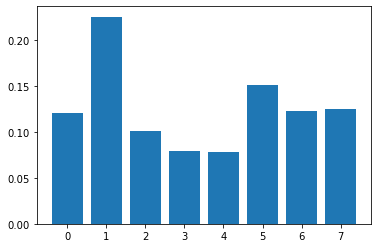

In [86]:
%matplotlib inline
plt.bar([x for x in range(len(imp))],imp)
plt.show()